# Random_forest
* minmax 해서 모델1

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import seaborn as sns
%matplotlib inline
import joblib

In [2]:
# 평가지표
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.base import BaseEstimator

In [3]:
# 데이터 로딩
pdf = pd.read_csv('./MinMax_model01.csv', encoding='utf-8')
pdf

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2012-08-02 04:00:00,0.334646,0.409742,0.107143,0.128205,0.463588,1.0
1,2018-06-15 18:00:00,0.350394,0.438395,0.107143,0.115385,0.529307,1.0
2,2018-04-24 12:00:00,0.188976,0.375358,0.089286,0.089744,0.467140,1.0
3,2018-03-22 06:00:00,0.094488,0.300860,0.285714,0.282051,0.536412,1.0
4,2018-03-17 08:00:00,0.192913,0.249284,0.107143,0.115385,0.870337,1.0
...,...,...,...,...,...,...,...
199504,2018-03-20 10:00:00,0.578740,0.756447,0.392857,0.410256,0.735346,2.0
199505,2012-04-03 07:00:00,0.212598,0.469914,0.196429,0.217949,0.197158,2.0
199506,2018-07-03 20:00:00,0.622047,0.767908,0.410714,0.435897,0.111901,2.0
199507,2018-03-20 09:00:00,0.531496,0.704871,0.357143,0.371795,0.721137,2.0


In [4]:
# index
pdf = pdf.set_index('일시')
pdf

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2012-08-02 04:00:00,0.334646,0.409742,0.107143,0.128205,0.463588,1.0
2018-06-15 18:00:00,0.350394,0.438395,0.107143,0.115385,0.529307,1.0
2018-04-24 12:00:00,0.188976,0.375358,0.089286,0.089744,0.467140,1.0
2018-03-22 06:00:00,0.094488,0.300860,0.285714,0.282051,0.536412,1.0
2018-03-17 08:00:00,0.192913,0.249284,0.107143,0.115385,0.870337,1.0
...,...,...,...,...,...,...
2018-03-20 10:00:00,0.578740,0.756447,0.392857,0.410256,0.735346,2.0
2012-04-03 07:00:00,0.212598,0.469914,0.196429,0.217949,0.197158,2.0
2018-07-03 20:00:00,0.622047,0.767908,0.410714,0.435897,0.111901,2.0


In [7]:
print(pdf["특보강도"].value_counts())

1.0    66503
0.0    66503
2.0    66503
Name: 특보강도, dtype: int64


In [8]:
# 데이터셋
X_data = pdf[['WIND_SPEED', 'GUST_WIND', 'SIG_WAVE', 'MAX_WAVE', 'HPA']]
y_target = pdf['특보강도']

In [9]:
# 훈련세트와 테스트 세트로 나누기
# pdf = train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

* 학습시작

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_target, random_state=11)

In [11]:
X_train.shape

(149631, 5)

In [12]:
X_test.shape

(49878, 5)

In [13]:
y_train.shape

(149631,)

In [14]:
y_test.shape

(49878,)

In [15]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199509 entries, 2012-08-02 04:00:00 to 2018-03-22 03:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WIND_SPEED  199509 non-null  float64
 1   GUST_WIND   199509 non-null  float64
 2   SIG_WAVE    199509 non-null  float64
 3   MAX_WAVE    199509 non-null  float64
 4   HPA         199509 non-null  float64
 5   특보강도        199509 non-null  float64
dtypes: float64(6)
memory usage: 14.7+ MB


In [16]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_target.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_target).value_counts())

레이블 테스트 세트 크기 : (199509,)
테스트 세트 레이블 0 과 1의 분포도
1.0    66503
0.0    66503
2.0    66503
Name: 특보강도, dtype: int64


In [18]:
# 교차 검증 수행 (훈련세트와 검증세트 점수 비교해서 과대적합 파악)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_data, y_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9999899753927218 0.990491690356016


In [19]:
# 랜덤 포레스트 특성 중요도 출력
# 결정트리랑 비교 해보기
rf.fit(X_data, y_target)
print(rf.feature_importances_)

[0.13202633 0.2378497  0.23154015 0.28044565 0.11813816]


In [20]:
# OOB 점수를 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_data, y_target)
print(rf.oob_score_)

0.995940032780476


In [23]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9939


In [24]:
# RandomForest의 하이퍼 파라미터 default 상태
model = RandomForestClassifier()
model

RandomForestClassifier()

* plot

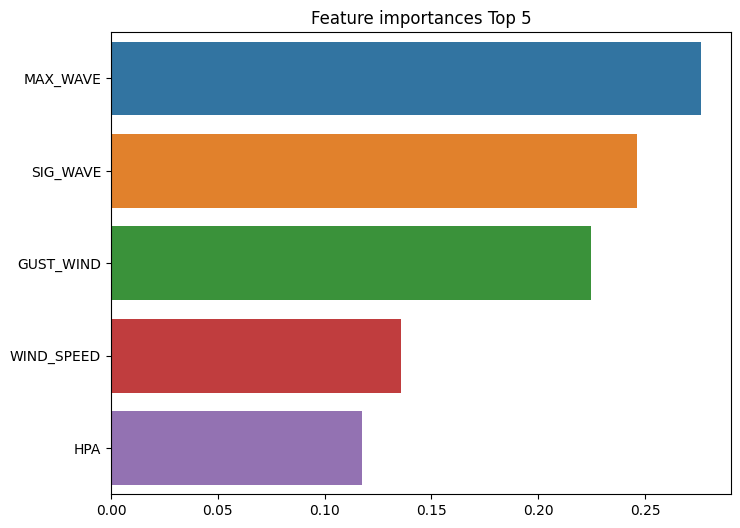

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 5')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

* 하이퍼 파라미터

In [26]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9549


In [29]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9580


In [44]:
joblib.dump(rf_clf1, 'Random_forest_model01.pkl')

['Random_forest_model01.pkl']

* 평가지표

In [31]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    # 분류의 대상이 되는 숫자가 7이든 아니든 상관없이 다수의 레이블 값인 0으로 만들어서 반환
    
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

In [ ]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_target.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_target).value_counts())

In [ ]:
# Fake Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()

fakeclf.fit(X_train , y_train)

fakepred = fakeclf.predict(X_test)

print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

# 평가지표

In [33]:
from sklearn.metrics import accuracy_score

In [43]:
def print_metrics(y, pred_y, title=None) :
    print(title)
    print("정확도:", accuracy_score(y, pred_y))
    print('재현율(recall):', recall_score(y, pred_y, average='macro'))
    print('정밀도(precision):', precision_score(y, pred_y, average='macro'))
    print('F1 score:', f1_score(y, pred_y,average='macro'))

print_metrics(y_test, pred, '랜덤포레스트 결과')

랜덤포레스트 결과
정확도: 0.957997513933999
재현율(recall): 0.9579336167235576
정밀도(precision): 0.9587627345335578
F1 score: 0.957925807161628


In [58]:
def print_metrics(y_target, pred, title=None) :
    print(title)
    print("정확도:", accuracy_score(y_target, pred))
    print('재현율(recall):', recall_score(y_target, pred, average='weighted'))
    print('정밀도(precision):', precision_score(y_target, pred, average='weighted'))
    print('F1 score:', f1_score(y_target, pred,average='weighted'))
    print('오차행렬:', confusion_matrix(y_test, pred))

print_metrics(y_test, pred, '랜덤포레스트 결과')

랜덤포레스트 결과
정확도: 0.957997513933999
재현율(recall): 0.957997513933999
정밀도(precision): 0.9587534698048904
F1 score: 0.9579534798486226
오차행렬: [[15110  1468     1]
 [  590 16026    36]
 [    0     0 16647]]
